# Convolutional Operations with different filters

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sample grayscale image
image = np.array([[10, 20, 30, 40, 50],
                  [60, 70, 80, 90, 100],
                  [110, 120, 130, 140, 150],
                  [160, 170, 180, 190, 200],
                  [210, 220, 230, 240, 250]], dtype=np.uint8)

# blur filter
blur_filter = np.array([[1, 1, 1], 
                   [1, 1, 1],
                   [1, 1, 1]])

blurred_image = cv2.filter2D(image, -1, blur_filter)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')

plt.tight_layout()
plt.show()


In [ ]:
# Sharpening Filter

sharpening_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpening_filter)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.tight_layout()
plt.show()

In [ ]:
# Vertical Edge Detection

kernel= np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Vertical Edge detection')

plt.tight_layout()
plt.show()

In [ ]:
# Horizontal Edge Detection

kernel= np.array([[1,2,1],
                  [2,2,0],
                  [0,1,2]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Horizontal Edge detection')

plt.tight_layout()
plt.show()

In [ ]:
# Edge detecction 

kernel= np.array([[1,1,1],
                  [1,8,1],
                  [1,1,1]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Edge detection')

plt.tight_layout()
plt.show()

In [ ]:
# Identity

# Vertical Edge Detection

kernel= np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])

output = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Identity')

plt.tight_layout()
plt.show()

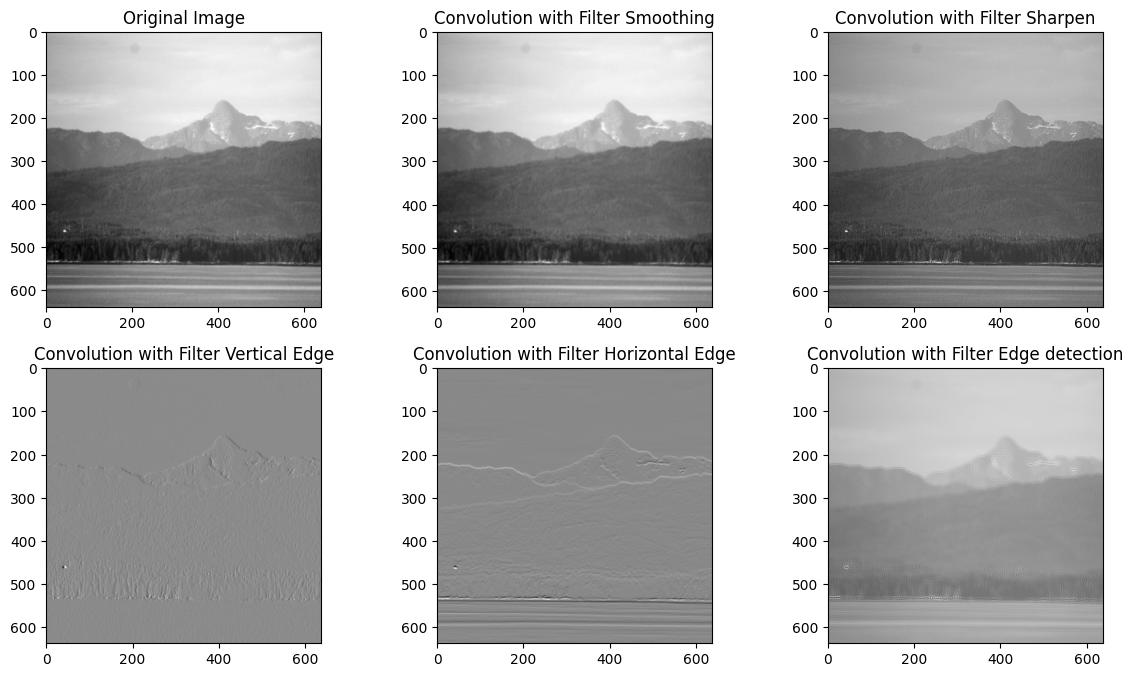

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Load the image using cv2.imread
image_path = "test.jpg"  # Replace with the actual image path
image_cv2 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Check if the image is loaded successfully
if image_cv2 is None:
    print("Error: Unable to load the image.")
    exit()

# Resize the image to 640x640
image_resized = cv2.resize(image_cv2, (640, 640))

# Reshape the image to match the expected input shape for convolution
image = image_resized.reshape(1, 640, 640, 1)

blur_filter = np.array([[1, 1, 1], 
                       [1, 1, 1],
                       [1, 1, 1]], dtype=np.float32)

sharpening_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]], dtype=np.float32)

vertical_edge_filter = np.array([[1, 0, -1],
                                [2, 0, -2],
                                [1, 0, -1]], dtype=np.float32)

horizontal_edge_filter = np.array([[1, 2, 1],
                                  [0, 0, 0],
                                  [-1, -2, -1]], dtype=np.float32)

edge_detection_filter = np.array([[1, 1, 1],
                                 [1, -7, 1],
                                 [1, 1, 1]], dtype=np.float32)


# Create TensorFlow constants for the image and the filters
image_tensor = tf.constant(image,dtype=np.float32)

filters_list = [blur_filter, sharpening_filter, vertical_edge_filter, horizontal_edge_filter, edge_detection_filter]
filters=['Smoothing','Sharpen','Vertical Edge','Horizontal Edge','Edge detection']
# Perform convolution with each filter and display the results
plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')

for i, filter in enumerate(filters_list):
    filter_tensor = tf.constant(filter.reshape(3, 3, 1, 1), dtype=tf.float32)
    convolution = tf.nn.conv2d(image_tensor, filter_tensor, strides=1, padding='VALID')
    plt.subplot(3, 3, i + 2)
    plt.imshow(convolution.numpy().squeeze(), cmap='gray')
    plt.title(f'Convolution with Filter {filters[i]}')

plt.tight_layout()
plt.show()
